In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
data = yf.download(tickers='BBL.BK', period='max', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [11]:
data.reset_index(inplace=True)
data.columns = data.columns.droplevel(1)
data

Price,Date,Close,High,Low,Open,Volume
0,2000-01-04,33.187046,33.187046,32.403100,32.403100,2888500
1,2000-01-05,31.096531,31.880477,30.835216,31.357846,1936700
2,2000-01-06,29.528639,31.357847,29.267323,31.096531,1621900
3,2000-01-07,30.835211,30.835211,29.528634,30.573895,854600
4,2000-01-10,31.619160,32.141790,31.357844,31.880475,1190700
...,...,...,...,...,...,...
6256,2025-03-25,150.500000,152.000000,150.000000,151.000000,5160600
6257,2025-03-26,149.000000,150.500000,149.000000,150.500000,3313800
6258,2025-03-27,150.000000,150.500000,148.500000,149.500000,7851800
6259,2025-03-28,150.000000,151.000000,149.000000,150.000000,3833300


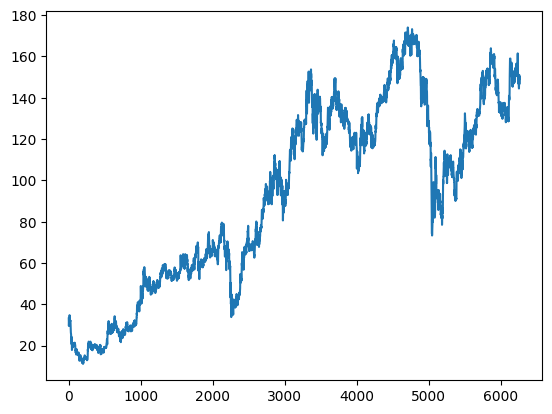

In [12]:
plt.plot(data.index, data.Close)
plt.show()

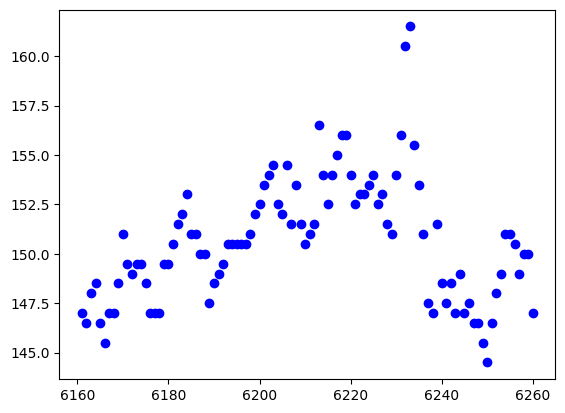

In [13]:
dfpl = data[-100:]
plt.plot(dfpl.index, dfpl.Close, "bo")
#color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.show()

In [34]:

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                                    open=dfpl['Open'],
                                    high=dfpl['High'],
                                    low=dfpl['Low'],
                                    close=dfpl['Close'],
                                    increasing_line_color='blue',
                                    decreasing_line_color='red'),
                go.Scatter(x=dfpl.index, y=[151.5]*len(dfpl), line=dict(color='yellow', width=2), name='Support/Resistance'),
                go.Scatter(x=dfpl.index, y=[156.5]*len(dfpl), line=dict(color='yellow', width=2), name='Support/Resistance'),
                go.Scatter(x=dfpl.index, y=dfpl.High+1, mode='markers', marker=dict(size=5, color='MediumPurple'), name='Signal')])
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(paper_bgcolor='black', plot_bgcolor='black',
                  margin_l=1, margin_r=1, margin_b=1, margin_t=1)
fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='black')
fig.show()